In [1]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
print(data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


One place in Data Science where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.

In this data science project we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

In [2]:
# for simplicity
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [4]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF–IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

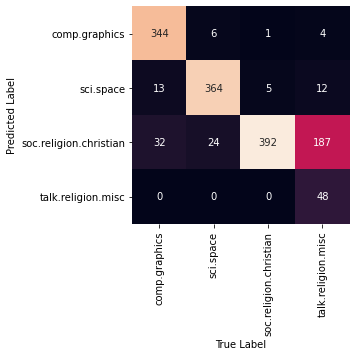

In [9]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()

In [10]:
# predict for a single string
def predict_category(s, train=train,model=model):
    pred = model.predict([s])
    print(train.target_names[pred[0]])

In [11]:
predict_category("sending a payload to the ISS")

sci.space


In [12]:
predict_category("discussing islam vs atheism")

soc.religion.christian


In [13]:
predict_category("determining the screen resolution")

comp.graphics
